In [1]:
import sys
import time
import math
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(1, '../src/')
import os.path
import kde as kde
import scms as scms

In [2]:
data = np.loadtxt('P_DeltaRc.1000.ascii', unpack=True, skiprows=1)
R = np.sqrt(data[1,:] ** 2 + data[2,:] ** 2)
z = data[3,:]
vz = data[6,:]
vR = (data[1,:] * data[4,:] + data[2,:] * data[5,:]) / R
vp = (data[1,:] * data[5,:] - data[2,:] * data[4,:]) / R
Lz = vp * R

In [3]:
x, y = np.linspace(-2,2,256), np.linspace(-0.9,0.9,256)
xx, yy = np.meshgrid(x, y)
xy = np.array([xx.flatten(), yy.flatten()]).T

In [4]:
data = np.vstack([z, vz]).T

In [5]:
start_time = time.time()
pdf2 = kde.kde2(data, x, y, bandwidth=0.02)
end_time = time.time()
print("Computation Time: {:.2f} seconds".format(end_time - start_time))

Computation Time: 0.03 seconds


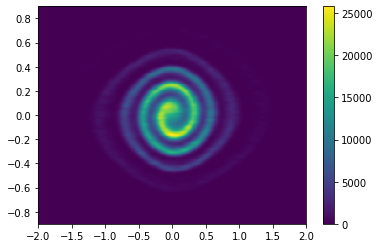

In [6]:
plt.pcolormesh(x, y, pdf2.T)
plt.colorbar()

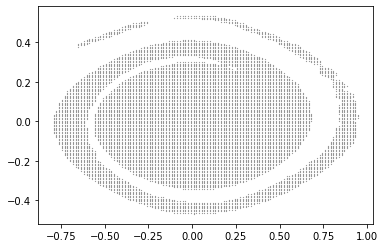

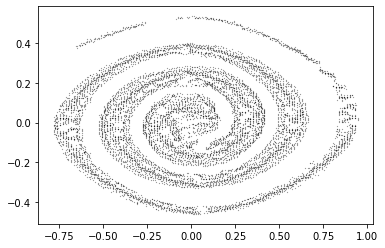

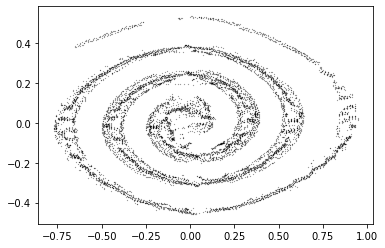

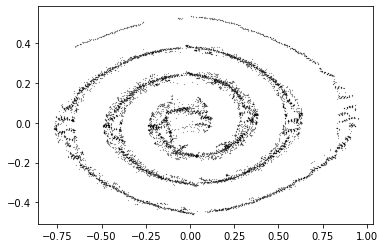

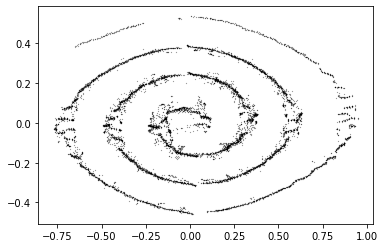

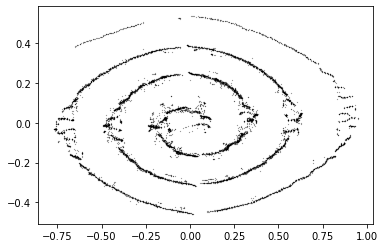

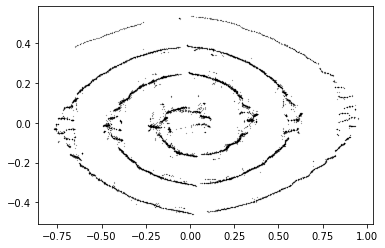

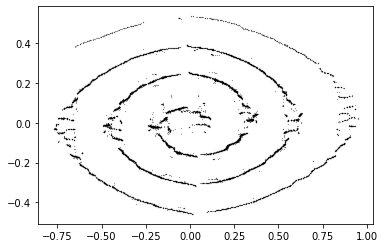

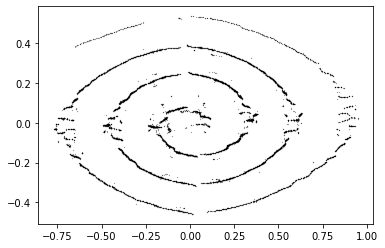

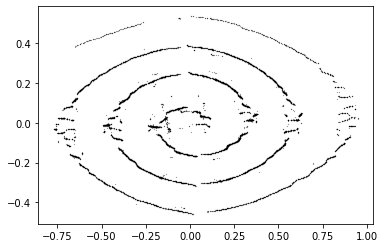

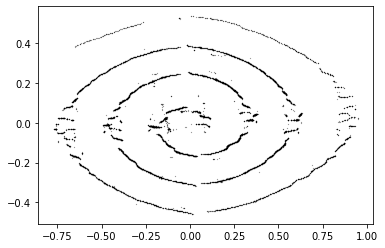

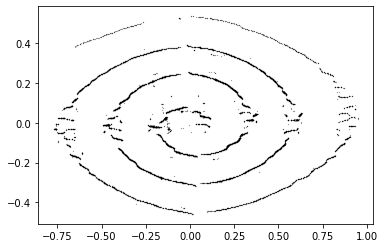

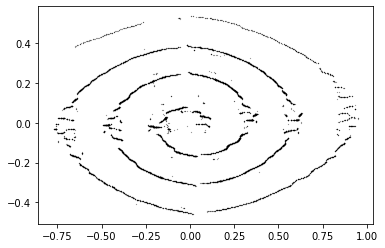

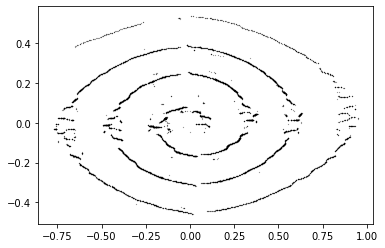

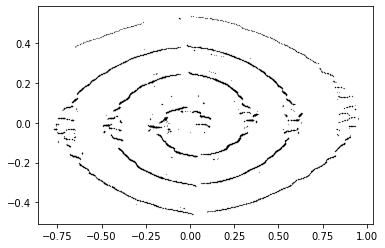

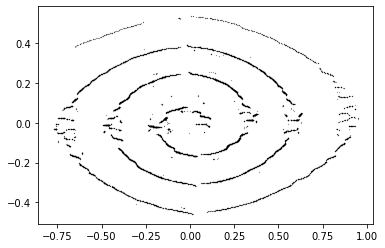

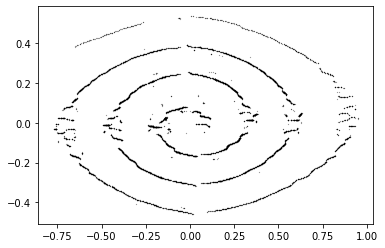

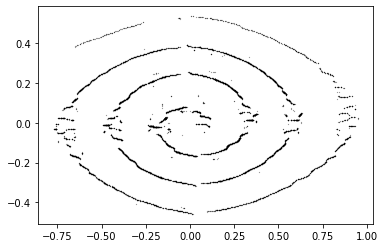

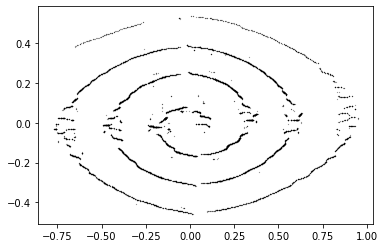

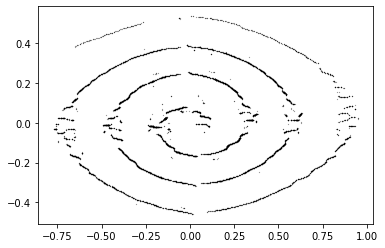

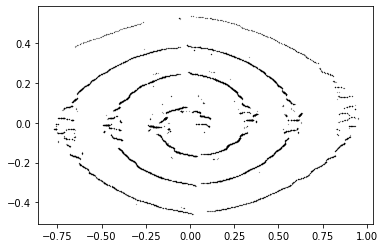

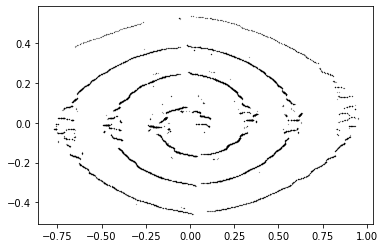

In [7]:
points = scms.generate_mesh2(x, y, 2000, pdf2)
plt.plot(points[:,0], points[:,1], 'k.', markersize=0.3)
plt.show()
dy, dx, dyy, dxx, dxy, dyx = kde.dkde2(data, x, y, bandwidth=0.02)
dpdf = [dx, dy]
ddpdf = [dxx, dyy, dxy, dyx]
new_points = scms.scms2(points, x, y, pdf2, dpdf, ddpdf)
plt.plot(points[:,0], points[:,1], 'k.', markersize=0.3)
plt.show()

In [22]:
data = np.vstack([R - 8, vR]).T

In [27]:
x, y = np.linspace(-2,2,256), np.linspace(-0.8,0.8,256)
xx, yy = np.meshgrid(x, y)
xy = np.array([xx.flatten(), yy.flatten()]).T
start_time = time.time()
pdf2 = kde.kde2(data, x, y, bandwidth=0.02)
end_time = time.time()
print("Computation Time: {:.2f} seconds".format(end_time - start_time))

Computation Time: 0.04 seconds


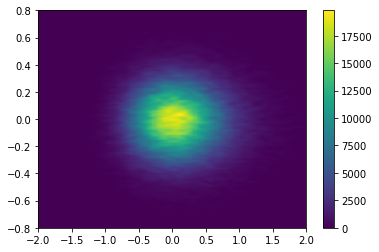

In [28]:
plt.pcolormesh(x, y, pdf2.T)
plt.colorbar()

In [ ]:
points = scms.generate_mesh2(x, y, 2000, pdf2)
plt.plot(points[:,0], points[:,1], 'k.', markersize=0.3)
plt.show()
dy, dx, dyy, dxx, dxy, dyx = kde.dkde2(data, x, y, bandwidth=0.02)
dpdf = [dx, dy]
ddpdf = [dxx, dyy, dxy, dyx]
new_points = scms.scms2(points, x, y, pdf2, dpdf, ddpdf)
plt.plot(points[:,0], points[:,1], 'k.', markersize=0.3)
plt.show()